In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
load_dotenv()

MYSQL_USERNAME = os.getenv('MYSQL_USERNAME')
MYSQL_PASSWORD = os.getenv('MYSQL_PASSWORD')
MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_PORT = os.getenv('MYSQL_PORT')
MYSQL_DB = os.getenv('STAGING_DB')

# Construct the MySQL connection string
if MYSQL_PASSWORD:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
else:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
print('Connection to MySQL database established successfully.')



In [ ]:

# Extract the data from the database
query = "SELECT * FROM us_companies_staging"  
us_data = pd.read_sql(query, con=engine)


query = "SELECT * FROM taiwan_companies_staging"  
taiwan_data = pd.read_sql(query, con=engine)

# Close the connection
engine.dispose()

print("Data extraction completed successfully.")

In [ ]:
taiwan_data_copy = taiwan_data.copy()
us_data_copy = us_data.copy()

In [ ]:
taiwan_data_copy.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
taiwan_data_copy.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

In [ ]:
taiwan_data_copy.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
us_data_copy.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
taiwan_data_copy.shape

(6819, 96)

In [ ]:
us_data_copy.shape

(78682, 21)

In [ ]:
taiwan_data_copy.isnull().sum().sort_values(ascending=False).head()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

In [ ]:
taiwan_data_copy.columns = [i.title().strip() for i in list(taiwan_data_copy.columns)]

rows = taiwan_data_copy.shape[0]
cols = taiwan_data_copy.shape[1]
print(f"The number of rows within the dataset are {rows} and the number of columns is {cols}")



The number of rows within the dataset are 6819 and the number of columns is 96


In [ ]:
us_data_copy.columns = [i.title().strip() for i in list(us_data_copy.columns)]

rows = us_data_copy.shape[0]
cols = us_data_copy.shape[1]
print(f"The number of rows within the dataset are {rows} and the number of columns is {cols}")



The number of rows within the dataset are 78682 and the number of columns is 21


In [ ]:
#print taiwain dtaset data types count for each type
print(f"Taiwan dataset data types count:\n\n{taiwan_data_copy.dtypes.value_counts()}")
print(f"\nUS dataset data types count:\n\n{us_data_copy.dtypes.value_counts()}")

Taiwan dataset data types count:

float64    93
int64       3
Name: count, dtype: int64

US dataset data types count:

float64    18
object      2
int64       1
Name: count, dtype: int64


In [ ]:
numeric_features = taiwan_data_copy.dtypes[taiwan_data_copy.dtypes != 'int64'].index
categorical_features = taiwan_data_copy.dtypes[taiwan_data_copy.dtypes == 'int64'].index

taiwan_data_copy[categorical_features].columns.tolist()

['Bankrupt', 'Liability-Assets Flag', 'Net Income Flag']

In [ ]:
print(taiwan_data_copy.columns.tolist() )

['Bankrupt', 'Roa(C) Before Interest And Depreciation Before Interest', 'Roa(A) Before Interest And % After Tax', 'Roa(B) Before Interest And Depreciation After Tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-Tax Net Interest Rate', 'After-Tax Net Interest Rate', 'Non-Industry Income And Expenditure/Revenue', 'Continuous Interest Rate (After Tax)', 'Operating Expense Rate', 'Research And Development Expense Rate', 'Cash Flow Rate', 'Interest-Bearing Debt Interest Rate', 'Tax Rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent Eps In The Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net Profit Before Tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-Tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Ra



**Findings:**

* All provided features are numerical, represented as either integers (int64) or floating-point numbers (float64)
* The columns `Net Income Flag` and `Liability-Assets Flag` appear to be categorical. These features indicate binary states
* The `Bankrupt` column is an integer columns and also categorical, representing binary outcomes (0 for non-bankrupt and 1 for bankrupt)
* There are no missing values in the dataset


In [ ]:
taiwan_data_copy['Liability-Assets Flag'].value_counts()

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

In [ ]:
liability_assets_flag_counts = taiwan_data_copy['Liability-Assets Flag'].value_counts()
liability_assets_flag_counts

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

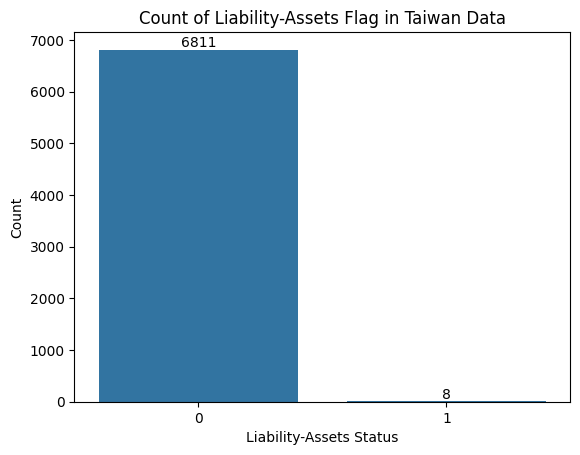

In [ ]:
sns.countplot(x = 'Liability-Assets Flag', data = taiwan_data_copy)

ax = plt.gca()

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')

# Add a title and labels
plt.xlabel('Liability-Assets Status')
plt.ylabel('Count')
plt.title('Count of Liability-Assets Flag in Taiwan Data')
plt.show()


In [ ]:
taiwan_data_copy['Net Income Flag'].value_counts()

Net Income Flag
1    6819
Name: count, dtype: int64

In [ ]:
# find intersection of columns in both datasets
intersection = set(taiwan_data_copy.columns).intersection(set(us_data_copy.columns))
print("Intersection of columns in both datasets", intersection)

Intersection of columns in both datasets set()


In [ ]:
# find difference of columns in both datasets
difference = set(taiwan_data_copy.columns).difference(set(us_data_copy.columns))
len(difference)

96

In [ ]:
# Count the occurrences of 0 and 1
bankrupt_counts = taiwan_data_copy['Bankrupt'].value_counts()

bankrupt_counts

Bankrupt
0    6599
1     220
Name: count, dtype: int64

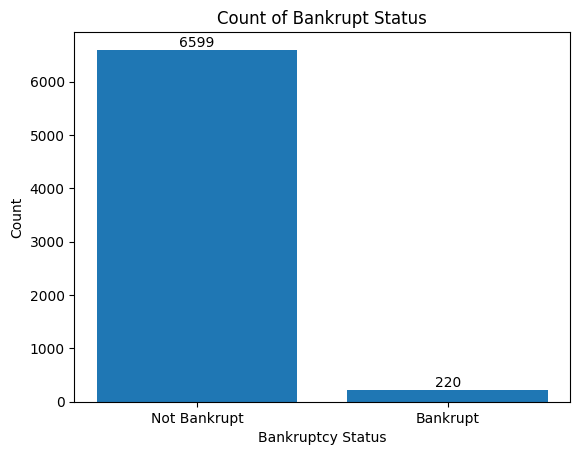

In [ ]:
bars = plt.bar(bankrupt_counts.index, bankrupt_counts.values, tick_label=['Not Bankrupt', 'Bankrupt'])

# Annotate the bars with their counts
plt.bar_label(bars, labels=bankrupt_counts.values)

plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.title('Count of Bankrupt Status')
plt.show()
